# Semantic Sentence Similarity

## Can you identify Sentence pairs that have the same intent?

The goal of this competition is to predict which of the provided pairs of questions contain two questions with the same meaning. The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

Please note: as an anti-cheating measure, Kaggle has supplemented the test set with computer-generated question pairs. Those rows do not come from Quora, and are not counted in the scoring. All of the questions in the training set are genuine examples from Quora.

# Data fields

id - the id of a training set question pair  
qid1, qid2 - unique ids of each question (only available in train.csv)  
question1, question2 - the full text of each question  
is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

In [2]:
!pip install pandas numpy matplotlib seaborn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install wordcloud

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
from wordcloud import WordCloud

In [6]:
import nltk
from nltk import word_tokenize
import re
import sys
from IPython.core.display import clear_output
from time import sleep,time
from nltk.corpus import stopwords

C:\Users\Amey Bhavsar\AppData\Local\Temp\ipykernel_25164\2932244015.py:5: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output


In [7]:
df=pd.read_csv("./train.csv")

In [8]:
df.iloc[3306]

id                                                           3306
qid1                                                         6553
qid2                                                         6554
question1                                                       .
question2       Why is Cornell's endowment the lowest in the I...
is_duplicate                                                    0
Name: 3306, dtype: object

# EDA
reference: https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb

In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [10]:
df.shape

(404290, 6)

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

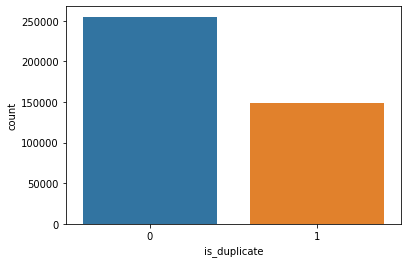

In [11]:
sns.countplot(x=df['is_duplicate'])

In [12]:
print("number of question pair: {}".format(len(df)))
print("Duplicate pair: {}".format(round(df['is_duplicate'].mean()*100,2)))
qids=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Number of duplicate Questions: {}".format(len(qids.unique())))
print("Number of questions that appears multiple times:{}".format(np.sum(qids.value_counts()>1)))

number of question pair: 404290
Duplicate pair: 36.92
Number of duplicate Questions: 537933
Number of questions that appears multiple times:111780


In [13]:
!pip install --upgrade matplotlib

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
train_qs=pd.Series(df['question1'].tolist()+df['question2'].tolist())
cloud=WordCloud(width=1200,height=1080).generate(" ".join(train_qs.astype(str)))

plt.figure(figsize=(20,15))
plt.imshow(cloud)

# Text Cleaning

reference: https://www.kaggle.com/currie32/the-importance-of-cleaning-text

In [16]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [17]:
list_q1=list(df['question1'])
list_q2=list(df['question2'])

In [18]:
for i in range(len(list_q1)):
    list_q1[i]=str(df['question1'][i])
    list_q2[i]=str(df['question2'][i])

In [19]:
q1_corpus=" ".join(list_q1)
q2_corpus=" ".join(list_q2)

In [20]:
q1_words=q1_corpus.split()
q2_words=q2_corpus.split()

In [21]:
def text2df(text):
    words=text.split()
    wordcount=dict()
    
    for i in range(len(words)):
        if words[i] not in wordcount.keys():
            wordcount[words[i]]=1
        else:
            wordcount[words[i]]+=1
    words=list(wordcount.keys())
    count=list(wordcount.values())
    
    df=pd.DataFrame(zip(words,count),columns=["Words","Count"])
    
    return df

In [22]:
word_couont=text2df(q1_corpus)
word_couont.sort_values(by=['Count'],ascending=False,inplace=True)
word_couont.reset_index(drop=True,inplace=True)

In [23]:
df['q1_words']=0
df['q2_words']=0
list_1=[]
list_2=[]
for i in range(len(df)):
    list_1.append(len(str(df['question1'][i]).split()))
    list_2.append(len(str(df['question2'][i]).split()))
df['q1_words']=list_1 
df['q2_words']=list_2

In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7


In [25]:
df.to_csv('train1.csv')

In [26]:
india_list=[]
for i in range(len(df)):
    check_s=re.findall(r'india',str(df['question1'][i]).lower())
    if len(check_s)>0:
        if check_s[0]=='india':
            india_list.append(i)
# print(count)

In [27]:
df=pd.read_csv("./train1.csv")

In [28]:
list_len_1=[]
list_len_2=[]
for i in range(len(df)):
    list_len_1.append(len(str(df['question1'][i])))
    list_len_2.append(len(str(df['question2'][i])))

In [29]:
list_len=list(set(list_len_1+list_len_2))

In [30]:
list_0=[]
for i in range(len(df)):
    if list_len_1[i]<=3 or list_len_2[i]<=3:
        list_0.append(i)

In [31]:
df.drop(list_0,inplace=True,axis=0)

In [32]:
df.reset_index(inplace=True)

In [33]:
def text2find(df,col,word):
    india_list=[]
    for i in range(len(df)):
        check_s=re.findall(word,str(df[col][i]).lower())
        if len(check_s)>0:
            if check_s[0]==word:
                india_list.append(i)
    return india_list   
def show_question(list_,range_,df):
    for i in range(range_):
        i=list_[i]
        print(df['question1'][i]," ",df['is_duplicate'][i],"\n",df['question2'][i]," ",df['is_duplicate'][i],"\n")

In [34]:
math_list=text2find(df,'question1','math]')

In [35]:
show_question(math_list,400,df)

How do I find the zeros of the polynomial function [math]f(x)=\dfrac{1}{2}x^{3}-3x[/math]?   0 
 How would you find the zero of the function for [math]y=\frac{4x^2 - 36x}{ x-9}[/math]?   0 

What is [math]x[/math] if [math]x+\left(\dfrac{1}{x}\right) =0[/math]?   0 
 What is [math]\mathop {\lim}\limits_{x \to 0^+}\frac{1}{x}^\frac{-x}{x+1}[/math]?   0 

How do I integrate [math]v^3(a^2-v^2)^{\frac{1}{2}}[/math] by substitution?   0 
 How do I integrate [math]\frac{x^2}{x^2-1}[/math]?   0 

What is the formula of [math](a+b)^3[/math]?   0 
 How can I be great at math?   0 

What is [math]\sqrt {2+\sqrt {2+\sqrt {2+\sqrt {2+...\infty}}}}[/math] ?   0 
 If [math]y=f(x)=\sqrt{x+\sqrt{x^2+\sqrt{x+\sqrt{x^2+\sqrt{...\infty}}}}}[/math] and [math]\int f'(x)dy=g(y)+c[/math]. Then what is [math]g[/math]?   0 

How do I solve [math]\frac{1}{4} x  + x = - 3 + \frac{1}{2} x[/math]?   0 
 How can I solve [math]\frac 1 x + \frac{2x}{x+3} = 2[/math]?   0 

If [math] \frac{1}{1} =1, \frac{2}{2} = 1, \f

In [10]:
df['len_def']=0
list_2=[]
for i in range(len(df)):
    l1=len(str(df['question1'][i]))
    l2=len(str(df['question2'][i]))
    list_2.append(abs(l1-l2))
df['len_def']=list_2

In [37]:
df['new_ld']=0
list_1=[]
for i in range(len(df)):
    if df['len_def'][i]>=0 and df['len_def'][i]<10:
        list_1.append(1)
    elif df['len_def'][i]>=10 and df['len_def'][i]<20:
        list_1.append(2)
    elif df['len_def'][i]>=20 and df['len_def'][i]<30:
        list_1.append(3)
    elif df['len_def'][i]>=30 and df['len_def'][i]<40:
        list_1.append(4)
    elif df['len_def'][i]>=40 and df['len_def'][i]<50:
        list_1.append(5)
    elif df['len_def'][i]>=50 and df['len_def'][i]<100:
        list_1.append(6)
    elif df['len_def'][i]>=100 and df['len_def'][i]<=1080:
        list_1.append(7)
df['new_ld']=list_1       

# Absolute difference between two question

# Conclusion:-

### Fro the below stacked bar chart we can easily say that if the difference between two questions is greater than 50 than it' more likely that questions will be dissimilar

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_ld', ylabel='count'>

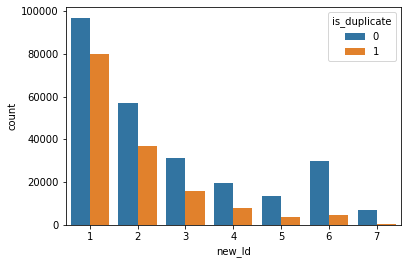

In [38]:
sns.countplot(df['new_ld'],hue=df['is_duplicate'])

In [ ]:
df['common_token']=0
count=0
start_time=time()
for i in range(len(df)):
    l1=str(df["question1"][i]).split()
    l2=str(df["question2"][i]).split()
    df['common_token'][i]=len(set(l1).intersection(l2))  
    count+=1
    
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(count, count/elapsed_time))
    clear_output(wait = True)

Request:371608; Frequency: 176.7625660710425 requests/s


In [7]:
df['total_words']=0
list_1=[]
for i in range(len(df)):
    list_1.append(df['q1_words'][i]+df['q2_words'][i])
df['total_words']=list_1

In [48]:
df['word_share']=0.0
list_word_share=[]
for i in range(len(df)):
    list_word_share.append(round(float(df['common_token'][i]/df['total_words'][i]),2))
df['word_share']=list_word_share

In [49]:
df.head()

,index,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words,len_def,new_ld,common_token,total_words,word_share
0,0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,9,1,0,26,0.0
1,1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13,37,4,0,21,0.0
2,2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10,14,2,0,24,0.0
3,3,3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9,15,2,0,20,0.0
4,4,4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7,37,4,0,20,0.0


In [14]:
def var2hist(df,col):
    set1=list(df[df['is_duplicate']==0][col])
    set2=list(df[df['is_duplicate']==1][col])
    
    sns.set_style('whitegrid')
    for dataset in (set1,set2):
        sns.distplot(dataset) 
    plt.legend(['Set1', 'Set2'])    

In [52]:
list3=[]
df['common_token']=0
for i in range(400000):
    l1=df['question1'][i].split()
    l2=df['question2'][i].split()
    list3.append(len(set(l1).intersection(l2)))
df['common_token']=list3    

ValueError: Length of values (400000) does not match length of index (404248)

In [53]:
df.head()

,index,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words,len_def,new_ld,common_token,total_words,word_share
0,0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,9,1,0,26,0.0
1,1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13,37,4,0,21,0.0
2,2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10,14,2,0,24,0.0
3,3,3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9,15,2,0,20,0.0
4,4,4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7,37,4,0,20,0.0


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipp

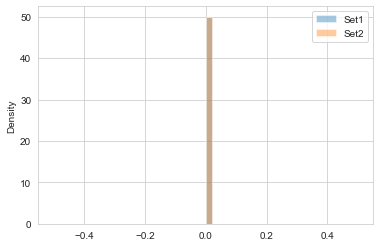

In [54]:
var2hist(df,'word_share')

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipp

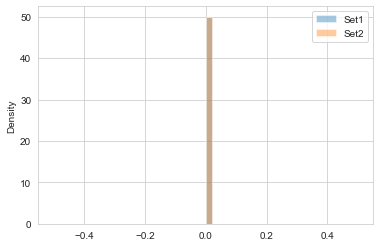

In [55]:
var2hist(df,'common_token')

In [57]:
def text_preprocessing(text):
 
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"What's", "What is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3",text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    text = re.sub(r"[^A-Za-z0-9\-|]", " ", text)
    
    return text

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Amey
[nltk_data]     Bhavsar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [60]:
stopwords=list(set(stopwords.words('english')))

In [8]:
def common_stop(df,stopwords):
    df['stop_count']=0
    df['common_word']=0
    list_1=[]
    list_2=[]
    for i in range(len(df)):        
        l1=str(df["question1"][i]).split()
        l2=str(df["question2"][i]).split()
        l3=set(l1).intersection(l2)
        list_1.append(len(l3.difference(stopwords)))
        list_2.append(len(l3.intersection(stopwords)))
    df['stop_count']=list_2
    df['common_word']=list_1
    return df      

In [62]:
df=common_stop(df,stopwords)

In [63]:
df['csc_min']=0.0
df['csc_max']=0.0
df['ctc_min']=0.0
df['ctc_max']=0.0
list_csc_min=[]
list_csc_max=[]
list_ctc_min=[]
list_ctc_max=[]

for i in range(len(df)):
   
 #      df['last_word_eq']=0
#     df['first_word_eq']=0
   
#     last_word_freq=[]
#     first_word_freq=[]
    q1_words=df['q1_words'][i]
    q2_words=df['q2_words'][i]
    list_csc_min.append(round(float(df['stop_count'][i]/(min(q1_words,q2_words))),2))
    list_csc_max.append(round(float(df['stop_count'][i]/(max(q1_words,q2_words))),2))
    list_ctc_min.append(round(float(df['common_token'][i]/(min(q1_words,q2_words))),2))
    list_ctc_max.append(round(float(df['common_token'][i]/(max(q1_words,q2_words))),2))
    

df['csc_min']=list_csc_min
df['csc_max']=list_csc_max
df['ctc_min']=list_ctc_min
df['ctc_max']=list_ctc_max
    


In [64]:
list_cwc_min=[]
list_cwc_max=[]
for i in range(len(df)):
    
    q1_words=df['q1_words'][i]
    q2_words=df['q2_words'][i]
    list_cwc_min.append(round(float(df['common_word'][i]/(min(q1_words,q2_words))),2))
    list_cwc_max.append(round(float(df['common_word'][i]/(max(q1_words,q2_words))),2))
    

In [65]:
df['cwc_min']=list_cwc_min
df['cwc_max']=list_cwc_max

In [66]:
df['last_word_eq']=0
df['first_word_eq']=0

last_word_freq=[]
first_word_freq=[]

count=0
for i in range(len(df)):
   
    list1=(str(df['question1'][i]).split())
    list2=(str(df['question2'][i]).split())
    count+=1
    if list1[-1]==list2[-1]:
        last_word_freq.append(1)
    else:
        last_word_freq.append(0)
    if list1[0]==list2[0] :
        first_word_freq.append(1)
    else:
        first_word_freq.append(0)

In [67]:
df['last_word_eq']=last_word_freq
df['first_word_eq']=first_word_freq

In [68]:
def clean_text(df):
    q1_list=[str(df['question1'][i]) for i in range(len(df))]
    q2_list=[str(df['question2'][i]) for i in range(len(df))]
    string1="|".join(q1_list)
    string2="|".join(q2_list)
    string1=text_preprocessing(string1)
    string2=text_preprocessing(string2)
    df['question1']=string1.split("|")
    df['question2']=string2.split("|")
    
    return df

In [69]:
df=clean_text(df)

ValueError: Length of values (404464) does not match length of index (404248)

In [71]:
!pip install fuzzywuzzy

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 


C:\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
list_fuzz=[]
df['fuzz_ratio']=0
count=0
for i in range(len(df)):
    list_fuzz.append(fuzz.ratio(str(df['question1'][i]),str(df['question2'][i])))
    count+=1
    print(count)
    clear_output(wait=True)
df['fuzz_ratio']=list_fuzz

392241


In [2]:
# df.to_csv('./ankita_sucks.csv');
import pandas as pd
df = pd.read_csv('./ankita_sucks.csv');

In [12]:
list1=[]
for i in range(len(df)):
    list1.append(fuzz.ratio(str(list_1[i]),str(list_2[i]))) 
df['fuzz_ratio']=list1

In [76]:
df['fuzz_ratio']=list1

ValueError: Length of values (404241) does not match length of index (404248)

In [15]:
var2hist(df,'fuzz_ratio')

NameError: name 'sns' is not defined

In [16]:
list1=[]
for i in range(404241):
    list1.append(fuzz.partial_ratio(str(list_1[i]),str(list_2[i]))) 
# df['partial_ratio']=list1

In [ ]:
var2hist(df,'partial_ratio')

In [ ]:
df=pd.read_csv("E://DATA Science//Datasets//Kaggle//Quora//train_4.csv")

In [ ]:
df1=pd.read_csv("E://DATA Science//Datasets//Kaggle//Quora//train.csv")

In [2]:
!pip install gensim

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import gensim


In [4]:
limitEmbeddings = 1200000

In [7]:
model = gensim.models.KeyedVectors.load_word2vec_format('./bin/GoogleNews-vectors-negative300.bin',limit=limitEmbeddings, binary=True)

In [8]:
model.similarity('this', 'is')

0.40797037

In [9]:
model.save('./word2vec.model')

In [ ]:
df.head()

In [ ]:
df1=pd.read_csv("E://DATA Science//Datasets //Kaggle//Quora//train_4.csv")

In [ ]:
df['question2'][408]

In [ ]:
df1['question2'][408]

In [ ]:
var2hist(df1,'partial_ratio')

In [ ]:
df1.head()

In [ ]:
df.column